In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/AICU/CropParameters.csv")
df

,%Time,Stem_elong,Stem_thick,Cum_trusses,stem_dens,plant_dens
0,43823,18.7,8.3,NaN,3.6,1.8
1,43830,29.9,11.7,1.3,3.6,1.8
2,43838,35.8,13.6,3.2,3.6,1.8
3,43845,35.1,13.5,4.7,3.6,1.8
4,43852,34.7,12.6,5.8,3.6,1.8
5,43859,32.4,11.3,6.9,3.6,1.8
6,43866,29.4,10.9,8.1,3.6,1.8
7,43873,30.8,10.7,9.2,3.6,1.8
8,43880,29.1,11.3,10.4,3.6,1.8
9,43887,36.5,11.2,11.6,3.6,1.8


#Report

In [1]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.0 MB 142 kB/s
     |████████████████████████████████| 102 kB 6.1 MB/s 
     |████████████████████████████████| 690 kB 16.6 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 9.8 MB 31.8 MB/s 
     |████████████████████████████████| 4.7 MB 46.1 MB/s 
     |████████████████████████████████| 296 kB 25.0 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.4.0-py2.py3-none-any.whl size=315269 sha256=8289268503b488c71fd58e0d95fe78294d49307c8646d08d2d8c59b30f036bc4
  Stored in directory: /tmp/pip-ephem-wheel-cache-06d6ah4a/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=bd6aff30d841ec793c7e944cdb96cc9e1c59ebd2208f35bc2e389bf574c87fe2
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940

In [4]:
from pandas_profiling import ProfileReport

profile=ProfileReport(df,title="Crop Parameters",html={"style":{"full_width":False}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
profile.to_file(output_file="Crop Parameters.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   %Time        23 non-null     int64  
 1   Stem_elong   23 non-null     object 
 2   Stem_thick   18 non-null     float64
 3   Cum_trusses  18 non-null     float64
 4   stem_dens    23 non-null     float64
 5   plant_dens   23 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.2+ KB


In [7]:
df['Stem_elong'] = df['Stem_elong'].astype(float) #converting stem_elong which is in string to float

In [8]:
df.isnull().sum()

%Time          0
Stem_elong     5
Stem_thick     5
Cum_trusses    5
stem_dens      0
plant_dens     0
dtype: int64

In [9]:
df["Stem_thick"]=df["Stem_thick"].fillna(df["Stem_thick"].mean())
df["Cum_trusses"]=df["Cum_trusses"].fillna(df["Cum_trusses"].mean())
df["Stem_elong"]=df["Stem_elong"].fillna(df["Stem_elong"].mean())

In [10]:
import datetime as dt
df['%Time'] = pd.TimedeltaIndex(df['%Time'], unit='d') + dt.datetime(1899, 12, 30)
df

,%Time,Stem_elong,Stem_thick,Cum_trusses,stem_dens,plant_dens
0,2019-12-24,18.700000,8.300000,12.516667,3.6,1.8
1,2019-12-31,29.900000,11.700000,1.300000,3.6,1.8
2,2020-01-08,35.800000,13.600000,3.200000,3.6,1.8
3,2020-01-15,35.100000,13.500000,4.700000,3.6,1.8
4,2020-01-22,34.700000,12.600000,5.800000,3.6,1.8
5,2020-01-29,32.400000,11.300000,6.900000,3.6,1.8
6,2020-02-05,29.400000,10.900000,8.100000,3.6,1.8
7,2020-02-12,30.800000,10.700000,9.200000,3.6,1.8
8,2020-02-19,29.100000,11.300000,10.400000,3.6,1.8
9,2020-02-26,36.500000,11.200000,11.600000,3.6,1.8


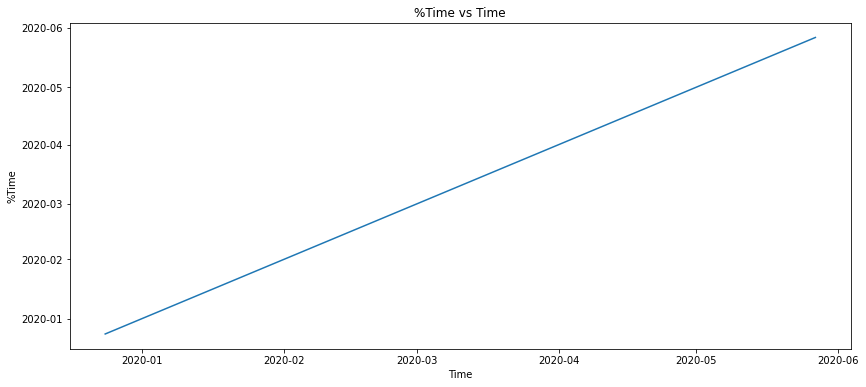

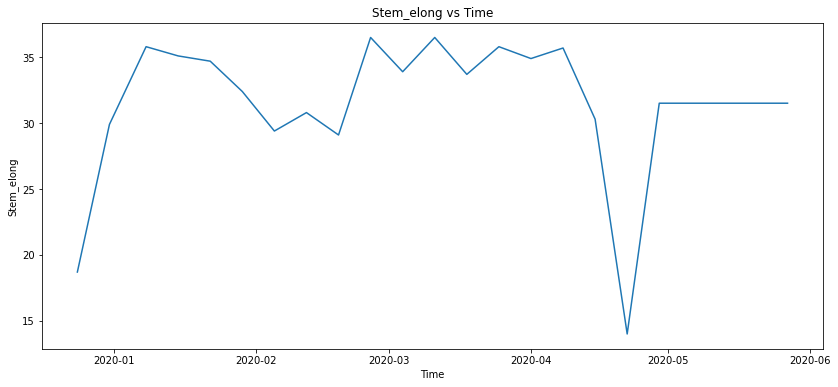

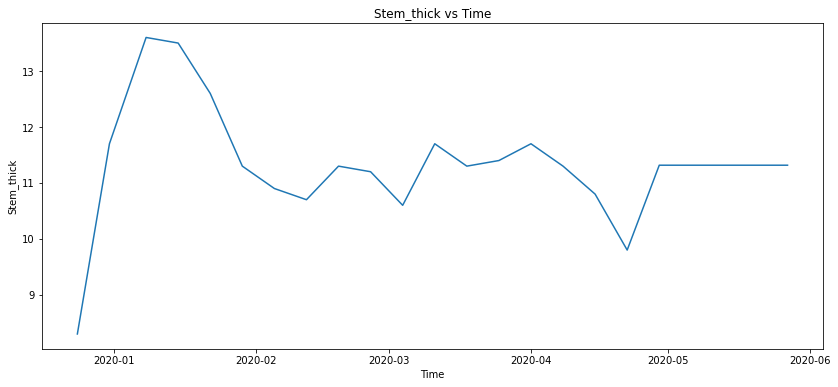

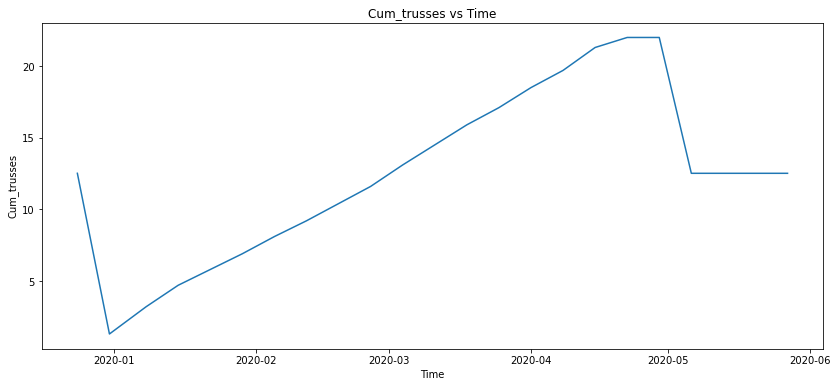

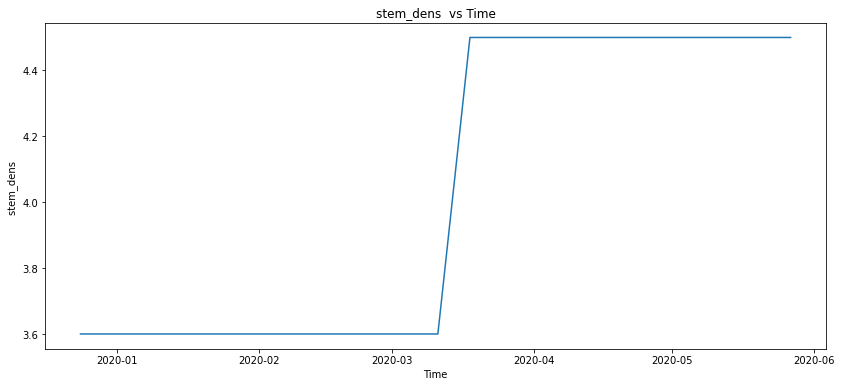

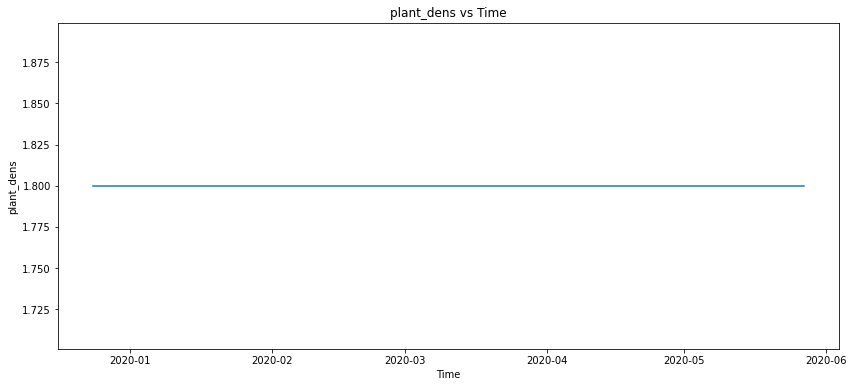

In [11]:
for i in df:
  plt.figure(figsize=(14,6))
  sns.lineplot(data=df, x="%Time", y=df[i])
  plt.title("{} vs Time".format(i))
  plt.xlabel("Time")
  plt.ylabel(i)
  plt.show()

#Observations

1.Both stem growth and stem thickness shows a significant seasonal beahviour during the period of march to april stems shows the highest level of growth.

2.Talking about thickness during january it was showing the highest growth in thickness after which it fell in feb.From feb to the month of april the thickness was increasing with time after which there was not a notable growth in thickness after april.

3.For Cumulative number of new set trusses on the stem (cum_trusses) it just keept on increasing after jan,it achieved stability for some short time before may after which it decreased and again showed stable behaviour.

4.Stem density was stable untill march then it got a sudden range after march and by april it was stable again.Inshort stems shows a high density after mid march.

5.Plant density does not have any effect with time.

#Conclusion

In conclusion the period around the second week of March upto the third or the forth week of April shows a real good growth in every parameters of the crops.